In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[18, '남','김천고'], [19, '여', '울산고']],
                 index=['진현', '민지'],
                 columns=['나이', '성별', '학교'])

In [2]:
print(df)
print(id(df))
df.rename(columns = {'나이' : '연령', '성별':'남여', '학교':'소속'}, inplace = True)
print(df)
print(id(df))
new_df = df.rename(index = {'진현':'학생1', '민지':'학생2'})
print(new_df)
print(id(new_df))
print(df)

    나이 성별   학교
진현  18  남  김천고
민지  19  여  울산고
1767373358416
    연령 남여   소속
진현  18  남  김천고
민지  19  여  울산고
1767373358416
     연령 남여   소속
학생1  18  남  김천고
학생2  19  여  울산고
1767343305440
    연령 남여   소속
진현  18  남  김천고
민지  19  여  울산고


In [4]:
df.drop('진현', axis=0, inplace = True) # 기본값은 axis=0 행 삭제
print(df)

    나이 성별   학교
민지  19  여  울산고


In [4]:
print(df)

    연령 남여   소속
진현  18  남  김천고
민지  19  여  울산고


In [3]:
df.drop('진현', axis=1, inplace = True)
print(df)

KeyError: "['진현'] not found in axis"

In [5]:
import numpy as np
exam_data = {'이름': ['진현', '민지', '성철', '지산'], '수학':[100, 40, 70, 30], '영어': [50, 70, 90, 80], '생물': [50, 90, 70, 18], '도덕': [88, 68, 58, 77]}
df = pd.DataFrame(exam_data)
print(df)


   이름   수학  영어  생물  도덕
0  진현  100  50  50  88
1  민지   40  70  90  68
2  성철   70  90  70  58
3  지산   30  80  18  77


In [6]:
df['국어'] = 80
print(df)

   이름   수학  영어  생물  도덕  국어
0  진현  100  50  50  88  80
1  민지   40  70  90  68  80
2  성철   70  90  70  58  80
3  지산   30  80  18  77  80


In [7]:
df.loc[1] = ['하나',1,2,3,4,5] # 행 위치 1의 데이터가 수정됨
print(df)

   이름   수학  영어  생물  도덕  국어
0  진현  100  50  50  88  80
1  하나    1   2   3   4   5
2  성철   70  90  70  58  80
3  지산   30  80  18  77  80


In [8]:
df.loc[4] = 100 # 행 위치 4에 새로운 행 추가
print(df)

    이름   수학   영어   생물   도덕   국어
0   진현  100   50   50   88   80
1   하나    1    2    3    4    5
2   성철   70   90   70   58   80
3   지산   30   80   18   77   80
4  100  100  100  100  100  100


In [9]:
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
print(df)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


In [10]:
new_index = ['r0', 'r1', 'r2', 'r3', 'r4']
ndf = df.reindex(new_index)
print(ndf) # 추가되는 부분은 행 인덱스의 행 데이터는 NaN 값이 된다.

     c0   c1   c2    c3    c4
r0  1.0  4.0  7.0  10.0  13.0
r1  2.0  5.0  8.0  11.0  14.0
r2  3.0  6.0  9.0  12.0  15.0
r3  NaN  NaN  NaN   NaN   NaN
r4  NaN  NaN  NaN   NaN   NaN


In [11]:
# 추가되는 부분을 NaN이 아닌 값으로 채우려면 fill_value 옵션을 사용
new_index = ['r0', 'r1', 'r2', 'r3', 'r4']
ndf2 = df.reindex(new_index, fill_value = 0)
print(ndf2)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15
r3   0   0   0   0   0
r4   0   0   0   0   0


In [12]:
ndf = df.reset_index()
print(df)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


In [14]:
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
      columns=[["A", "A", "B", "B"], ["C", "D", "C", "D"]],
      index=[["M", "M", "M", "F", "F", "F"], ["id_" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ['Cidx1', 'Cidx2']
df4.index.names = ['Ridx1', 'Ridx2']
print(df4)

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   0.60  0.11  0.72  1.42
      id_2  -0.27 -1.11  0.03  0.81
      id_3  -1.86 -1.41  1.15  0.43
F     id_1  -1.84  0.17  0.51 -1.12
      id_2   1.65 -1.45  1.23  1.40
      id_3  -2.46  0.66  0.52 -1.90


In [21]:
df = df4.stack('Cidx1')
print(df)

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      0.60  0.11
            B      0.72  1.42
      id_2  A     -0.27 -1.11
            B      0.03  0.81
      id_3  A     -1.86 -1.41
            B      1.15  0.43
F     id_1  A     -1.84  0.17
            B      0.51 -1.12
      id_2  A      1.65 -1.45
            B      1.23  1.40
      id_3  A     -2.46  0.66
            B      0.52 -1.90


In [22]:
df = df4.stack(1)
print(df)

Cidx1                 A     B
Ridx1 Ridx2 Cidx2            
M     id_1  C      0.60  0.72
            D      0.11  1.42
      id_2  C     -0.27  0.03
            D     -1.11  0.81
      id_3  C     -1.86  1.15
            D     -1.41  0.43
F     id_1  C     -1.84  0.51
            D      0.17 -1.12
      id_2  C      1.65  1.23
            D     -1.45  1.40
      id_3  C     -2.46  0.52
            D      0.66 -1.90


In [24]:
df = df4.unstack('Ridx2')
print(df)

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F     -1.84  1.65 -2.46  0.17 -1.45  0.66  0.51  1.23  0.52 -1.12  1.40 -1.90
M      0.60 -0.27 -1.86  0.11 -1.11 -1.41  0.72  0.03  1.15  1.42  0.81  0.43


In [26]:
df = df4.unstack(0)
print(df)

Cidx1     A                       B                  
Cidx2     C           D           C           D      
Ridx1     F     M     F     M     F     M     F     M
Ridx2                                                
id_1  -1.84  0.60  0.17  0.11  0.51  0.72 -1.12  1.42
id_2   1.65 -0.27 -1.45 -1.11  1.23  0.03  1.40  0.81
id_3  -2.46 -1.86  0.66 -1.41  0.52  1.15 -1.90  0.43


In [33]:
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
      columns=[["A", "A", "B", "B"], ["C1", "C2", "C1", "C2"]])
print(df3)

      A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85


In [34]:
print(df3[('B', 'C1')]) # 하위 인덱스는 튜플로 작성해야 함.

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64


In [35]:
print(df3.loc[0, ('B', 'C1')])

0.98


In [36]:
df3.loc[0, ('B', 'C1')] = 100
print(df3)

      A             B      
     C1    C2      C1    C2
0  1.76  0.40  100.00  2.24
1  1.87 -0.98    0.95 -0.15
2 -0.10  0.41    0.14  1.45
3  0.76  0.12    0.44  0.33
4  1.49 -0.21    0.31 -0.85


In [37]:
print(df3['A']) # 상위 인덱스는 튜플 없이 쓸 수 있음

     C1    C2
0  1.76  0.40
1  1.87 -0.98
2 -0.10  0.41
3  0.76  0.12
4  1.49 -0.21


In [39]:
csv_test = pd.read_csv('test_text_file.txt', sep='|', index_col=0)
print(csv_test )
csv_test2 =pd.read_csv('test_text_file.txt', sep='|', index_col='ID')
print(csv_test2 )

      A  B  C    D
ID                
C1  1.0  2  3  NaN
C2  5.0  ?  7  8.0
C3  NaN  3  5  7.0
      A  B  C    D
ID                
C1  1.0  2  3  NaN
C2  5.0  ?  7  8.0
C3  NaN  3  5  7.0


In [40]:
df = pd.read_csv('test_text_file.txt', sep='|')
print(df)

   ID    A  B  C    D
0  C1  1.0  2  3  NaN
1  C2  5.0  ?  7  8.0
2  C3  NaN  3  5  7.0


In [41]:
df = pd.read_csv('text_without_column_name.txt', sep='|')
print(df)

   C1    1  2  3  nan
0  C2  5.0  ?  7    8
1  C3  NaN  3  5    7


In [42]:
df = pd.read_csv('text_without_column_name.txt', sep='|', names = ['ID', 'A', 'B', 'C', 'D'])
print(df)

   ID    A  B  C    D
0  C1  1.0  2  3  NaN
1  C2  5.0  ?  7  8.0
2  C3  NaN  3  5  7.0


In [43]:
df = pd.read_csv('text_without_column_name.txt', sep='|', names = ['ID', 'A', 'B', 'C', 'D'], 
                 header = None)
print(df)

   ID    A  B  C    D
0  C1  1.0  2  3  NaN
1  C2  5.0  ?  7  8.0
2  C3  NaN  3  5  7.0


In [44]:
df = pd.read_csv('text_without_column_name.txt', sep='|', names = ['ID', 'A', 'B', 'C', 'D'], 
                 header = None, index_col='ID')
print(df)

      A  B  C    D
ID                
C1  1.0  2  3  NaN
C2  5.0  ?  7  8.0
C3  NaN  3  5  7.0


In [3]:
import pandas as pd
df = pd.read_csv('./datas/test_csv_file.csv')
print(df)

   ID LAST_NAME  AGE
0   1       KIM   30
1   2      CHOI   25
2   3       LEE   41
3   4      PARK   19
4   5       LIM   36


In [4]:
df = pd.read_csv('./datas/test_csv_file.csv', skiprows=[1,2])
print(df)

   ID LAST_NAME  AGE
0   3       LEE   41
1   4      PARK   19
2   5       LIM   36


In [5]:
df = pd.read_csv('./datas/test_csv_file.csv', nrows=3)
print(df)

   ID LAST_NAME  AGE
0   1       KIM   30
1   2      CHOI   25
2   3       LEE   41


In [19]:
df = pd.read_csv('./datas/test_text_file.txt', sep='|')
print(df)

   ID    A  B  C    D
0  C1  1.0  2  3  NaN
1  C2  5.0  ?  7  8.0
2  C3  NaN  3  5  7.0


In [26]:
df = pd.read_csv('./datas/test_text_file.txt', sep='|',
               na_values = ['?', '??', 'N/A', 'NA', 'nan', 'NaN', '-nan', '-NaN', 'null'])
print(df)

   ID    A    B  C    D
0  C1  1.0  2.0  3  NaN
1  C2  5.0  NaN  7  8.0
2  C3  NaN  3.0  5  7.0


In [32]:
df = pd.read_csv('./datas/test_csv_file.csv', nrows=3)
print(df)
print(df.info())

   ID LAST_NAME  AGE
0   1       KIM   30
1   2      CHOI   25
2   3       LEE   41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3 non-null      int64 
 1   LAST_NAME  3 non-null      object
 2   AGE        3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes
None


In [34]:
df = pd.read_csv('./datas/test_csv_file.csv', nrows=3, 
                 dtype = {'ID':int, 'LAST_NAME':str,'AGE':float})
print(df)
print(df.info())

   ID LAST_NAME   AGE
0   1       KIM  30.0
1   2      CHOI  25.0
2   3       LEE  41.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         3 non-null      int32  
 1   LAST_NAME  3 non-null      object 
 2   AGE        3 non-null      float64
dtypes: float64(1), int32(1), object(1)
memory usage: 188.0+ bytes
None


In [35]:
# JSON 데이터 읽고 쓰기
student_data = {
"1.FirstName": "Gildong",
"2.LastName": "Hong",
"3.Age": 20,
"4.University": "Yonsei University",
"5.Courses": [
{
"Major": "Statistics",
"Classes": ["Probability",
"Generalized Linear Model",
"Categorical Data Analysis"]
},
{
"Minor": "ComputerScience",
"Classes": ["Data Structure",
"Programming",
"Algorithms"]
}
]
}

In [36]:
import json
with open('student_file.json', 'w') as json_file :
    json.dump(student_data, json_file)

In [37]:
st_json = json.dumps(student_data)
print(st_json)

{"1.FirstName": "Gildong", "2.LastName": "Hong", "3.Age": 20, "4.University": "Yonsei University", "5.Courses": [{"Major": "Statistics", "Classes": ["Probability", "Generalized Linear Model", "Categorical Data Analysis"]}, {"Minor": "ComputerScience", "Classes": ["Data Structure", "Programming", "Algorithms"]}]}


In [38]:
st_json2 = json.dumps(student_data, indent=4)
print(st_json2)

{
    "1.FirstName": "Gildong",
    "2.LastName": "Hong",
    "3.Age": 20,
    "4.University": "Yonsei University",
    "5.Courses": [
        {
            "Major": "Statistics",
            "Classes": [
                "Probability",
                "Generalized Linear Model",
                "Categorical Data Analysis"
            ]
        },
        {
            "Minor": "ComputerScience",
            "Classes": [
                "Data Structure",
                "Programming",
                "Algorithms"
            ]
        }
    ]
}


In [39]:
st_json3 = json.dumps(student_data, indent=4, sort_keys=True)
print(st_json3)

{
    "1.FirstName": "Gildong",
    "2.LastName": "Hong",
    "3.Age": 20,
    "4.University": "Yonsei University",
    "5.Courses": [
        {
            "Classes": [
                "Probability",
                "Generalized Linear Model",
                "Categorical Data Analysis"
            ],
            "Major": "Statistics"
        },
        {
            "Classes": [
                "Data Structure",
                "Programming",
                "Algorithms"
            ],
            "Minor": "ComputerScience"
        }
    ]
}


In [41]:
import json
with open('test.json') as f:
    js = json.loads(f.read()) ## json 라이브러리 이용
df1 = pd.DataFrame(js)
print(df1)

   name  age
0  Jack   26
1   Ace   87


In [42]:
df2 = pd.read_json('test.json')
print(df2)

   name  age
0  Jack   26
1   Ace   87


In [43]:
df1.to_json() # name, age 열이름

'{"name":{"0":"Jack","1":"Ace"},"age":{"0":26,"1":87}}'

In [48]:
pd.DataFrame({"name":{"0":"Jack","1":"Ace"},"age":{"0":26,"1":87}})

,name,age
0,Jack,26
1,Ace,87


In [45]:
df1.to_json(orient='records') 

'[{"name":"Jack","age":26},{"name":"Ace","age":87}]'

In [49]:
pd.DataFrame([{"name":"Jack","age":26},{"name":"Ace","age":87}])

,name,age
0,Jack,26
1,Ace,87


In [46]:
df1.to_json(orient='index') 

'{"0":{"name":"Jack","age":26},"1":{"name":"Ace","age":87}}'

In [50]:
pd.DataFrame({"0":{"name":"Jack","age":26},"1":{"name":"Ace","age":87}})

,0,1
name,Jack,Ace
age,26,87


In [74]:
import json
import urllib
import pandas as pd
import sys
from urllib.request import Request, urlopen

urlTicker = Request("http://api.nobelprize.org/v1/prize.json", headers={'User-Agent': 'Mozilla/5.0'})
readTicker = urlopen(urlTicker).read()
jsonTicker = json.loads(readTicker)

print(jsonTicker.keys(), '\n')
print(jsonTicker['prizes'][0].keys(), '\n')
print(json.dumps(jsonTicker['prizes'][0], indent=4))

dict_keys(['prizes']) 

dict_keys(['year', 'category', 'laureates']) 

{
    "year": "2021",
    "category": "chemistry",
    "laureates": [
        {
            "id": "1002",
            "firstname": "Benjamin",
            "surname": "List",
            "motivation": "\"for the development of asymmetric organocatalysis\"",
            "share": "2"
        },
        {
            "id": "1003",
            "firstname": "David",
            "surname": "MacMillan",
            "motivation": "\"for the development of asymmetric organocatalysis\"",
            "share": "2"
        }
    ]
}


In [75]:
print(json.dumps(jsonTicker['prizes'][0], indent=4, sort_keys=True))

{
    "category": "chemistry",
    "laureates": [
        {
            "firstname": "Benjamin",
            "id": "1002",
            "motivation": "\"for the development of asymmetric organocatalysis\"",
            "share": "2",
            "surname": "List"
        },
        {
            "firstname": "David",
            "id": "1003",
            "motivation": "\"for the development of asymmetric organocatalysis\"",
            "share": "2",
            "surname": "MacMillan"
        }
    ],
    "year": "2021"
}


In [58]:
import pandas as pd
import xml.etree.ElementTree as ET
import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen
url = "https://www.w3schools.com/xml/cd_catalog.xml"
response = urlopen(url).read()
xtree = ET.fromstring(response)
print(xtree)

<Element 'CATALOG' at 0x0000014965F08360>


In [60]:
rows = []
# iterate through each node of the tree
for node in xtree:
    n_title = node.find("TITLE").text
    n_artist = node.find("ARTIST").text
    n_country = node.find("COUNTRY").text
    n_company = node.find("COMPANY").text
    n_price = node.find("PRICE").text
    n_year = node.find("YEAR").text
    rows.append({"title": n_title,
            "artist": n_artist,
            "country": n_country,
            "company": n_company,
            "price": n_price,
            "year": n_year})
print(rows)

[{'title': 'Empire Burlesque', 'artist': 'Bob Dylan', 'country': 'USA', 'company': 'Columbia', 'price': '10.90', 'year': '1985'}, {'title': 'Hide your heart', 'artist': 'Bonnie Tyler', 'country': 'UK', 'company': 'CBS Records', 'price': '9.90', 'year': '1988'}, {'title': 'Greatest Hits', 'artist': 'Dolly Parton', 'country': 'USA', 'company': 'RCA', 'price': '9.90', 'year': '1982'}, {'title': 'Still got the blues', 'artist': 'Gary Moore', 'country': 'UK', 'company': 'Virgin records', 'price': '10.20', 'year': '1990'}, {'title': 'Eros', 'artist': 'Eros Ramazzotti', 'country': 'EU', 'company': 'BMG', 'price': '9.90', 'year': '1997'}, {'title': 'One night only', 'artist': 'Bee Gees', 'country': 'UK', 'company': 'Polydor', 'price': '10.90', 'year': '1998'}, {'title': 'Sylvias Mother', 'artist': 'Dr.Hook', 'country': 'UK', 'company': 'CBS', 'price': '8.10', 'year': '1973'}, {'title': 'Maggie May', 'artist': 'Rod Stewart', 'country': 'UK', 'company': 'Pickwick', 'price': '8.50', 'year': '1990

In [80]:
import matplotlib.pyplot as plt
#XML text data를 dict로 저장된 list를 pandas DataFrame으로 변환
columns = ["title", "artist", "country", "company", "price", "year"]
catalog_cd_df = pd.DataFrame(rows, columns = columns)
catalog_cd_df.head(10)
#df.dtypes 로 각 칼럼의 데이터 형태를 확인 - 문자열 객체(string object)
print(catalog_cd_df.dtypes, '\n')
# astype()을 이용하여 칼럼 중에서 price는 float64, year는 int32로 변환
import numpy as np
catalog_cd_df = catalog_cd_df.astype({'price': np.float64, 'year': int})
print(catalog_cd_df.dtypes, '\n')
country_mean = catalog_cd_df.groupby('country').price.mean()
print(country_mean)
country_mean_df = pd.DataFrame(country_mean).reset_index()

title      object
artist     object
country    object
company    object
price      object
year       object
dtype: object 

title       object
artist      object
country     object
company     object
price      float64
year         int32
dtype: object 

country
EU        9.320000
Norway    7.900000
UK        8.984615
USA       9.385714
Name: price, dtype: float64


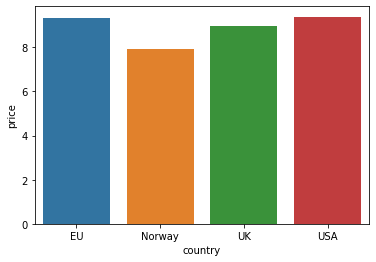

In [77]:
import seaborn as sns
sns.barplot(x='country', y='price', data=country_mean_df)
plt.show()

In [94]:
df3 = pd.read_excel('./datas/sales_per_region.xlsx', sheet_name = 'Sheet1', header=2)
                   #dtype = {'region':str, 'sales_representative':np.int64, 'sales_amount':float},
                   #index_col = 'id', na_values='NaN', nrows=7)
print(df3)
print(df3.info())

    id              region  sales_representative  sales_amount
0  1.0               seoul                 510.0        1500.0
1  2.0              inchon                 430.0        1260.0
2  3.0               busan                 320.0        1090.0
3  4.0             guangju                 180.0         550.0
4  5.0               ulsan                 135.0         380.0
5  6.0              sejong                 110.0         290.0
6  7.0              jeunju                  83.0         235.0
7  NaN  # ignore this line                   NaN           NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7 non-null      float64
 1   region                8 non-null      object 
 2   sales_representative  7 non-null      float64
 3   sales_amount          7 non-null      float64
dtypes: float64(3), object(

In [ ]:
import numpy as np
import pandas as pd
import os
base_dir = 'D:/admin/Documents'
excel_file = 'sales_per_region.xlsx'
excel_dir = os.path.join(base_dir, excel_file)
df_from_excel = pd.read_excel(excel_dir, sheet_name = 'Sheet1', header = 2,
#names = ['region', 'sales_representative', 'sales_amount'],
dtype = {'region': str, 'sales_representative': np.int64, 'sales_amount': float}, # dictionary type
index_col = 'id', na_values = 'NaN', thousands = ',',
nrows = 10, comment = '#')

In [95]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")
pd.set_option("display.max_rows", 20) # 앞뒤로 모두 20행만 보여준다.
print( df )

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [96]:
import sqlite3
print(sqlite3.sqlite_version_info) # (3, 28, 0)

(3, 38, 2)


In [5]:
import cx_Oracle

In [6]:
#한글 지원 방법
import os
os.putenv('NLS_LANG', '.UTF8')

In [13]:
connection = cx_Oracle.connect('c##scott', 'oracle', '192.168.219.100/xe')
cursor = connection.cursor()

In [16]:
cursor.execute("""
select *
from emp
where deptno = 10""")
print(cursor)

<cx_Oracle.Cursor on <cx_Oracle.Connection to c##scott@192.168.219.100/xe>>


In [17]:
#연결에 필요한 기본 정보(유저, 비밀번호, 데이터베이스 서버 주소)
for name in cursor:
    print("테스트 이름 리스트 : ", name)

테스트 이름 리스트 :  (7000, '홍길동', None, None, None, 3000.0, None, 10)
테스트 이름 리스트 :  (7782, 'CLARK', 'MANAGER', 7839, datetime.datetime(1981, 6, 9, 0, 0), 2450.0, None, 10)
테스트 이름 리스트 :  (7839, 'KING', 'PRESIDENT', None, datetime.datetime(1981, 11, 17, 0, 0), 5000.0, None, 10)
테스트 이름 리스트 :  (7934, 'MILLER', 'CLERK', 7782, datetime.datetime(1982, 1, 23, 0, 0), 1300.0, None, 10)


In [28]:
import pandas as pd
df_score3 = pd.DataFrame(columns = ['반', '번호', '국어', '영어', '수학'])
print(df_score3)
df_score3.index.names = ['반', '번호']

Empty DataFrame
Columns: [반, 번호, 국어, 영어, 수학]
Index: []


ValueError: Length of new names must be 1, got 2

In [30]:
df1 = pd.DataFrame({ '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
                    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']}, 
                    columns=['고객번호', '이름'])
print(df1)
df2 = pd.DataFrame({ '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
                    '금액': [10000, 20000, 15000, 5000, 100000, 30000]}, 
                    columns=['고객번호', '금액'])
print(df2)

   고객번호   이름
0  1001   둘리
1  1002  도우너
2  1003   또치
3  1004   길동
4  1005   희동
5  1006  마이콜
6  1007   영희
   고객번호      금액
0  1001   10000
1  1001   20000
2  1005   15000
3  1006    5000
4  1008  100000
5  1001   30000


In [31]:
print(pd.merge(df1, df2))

   고객번호   이름     금액
0  1001   둘리  10000
1  1001   둘리  20000
2  1001   둘리  30000
3  1005   희동  15000
4  1006  마이콜   5000


In [32]:
print(pd.merge(df1, df2, how='outer'))

   고객번호   이름        금액
0  1001   둘리   10000.0
1  1001   둘리   20000.0
2  1001   둘리   30000.0
3  1002  도우너       NaN
4  1003   또치       NaN
5  1004   길동       NaN
6  1005   희동   15000.0
7  1006  마이콜    5000.0
8  1007   영희       NaN
9  1008  NaN  100000.0


In [33]:
print(pd.merge(df1, df2, how='left'))

   고객번호   이름       금액
0  1001   둘리  10000.0
1  1001   둘리  20000.0
2  1001   둘리  30000.0
3  1002  도우너      NaN
4  1003   또치      NaN
5  1004   길동      NaN
6  1005   희동  15000.0
7  1006  마이콜   5000.0
8  1007   영희      NaN


In [34]:
print(pd.merge(df1, df2, how='right'))

   고객번호   이름      금액
0  1001   둘리   10000
1  1001   둘리   20000
2  1005   희동   15000
3  1006  마이콜    5000
4  1008  NaN  100000
5  1001   둘리   30000
